In [187]:
#imports
import requests
import os

from bs4 import BeautifulSoup
from wordcloud import WordCloud

import matplotlib.pyplot as plt
import pandas as pd



In [188]:
#read the key from enviromental variables
GUARDIAN_KEY = os.getenv('GUARDIAN_KEY')

In [189]:
#if you dont have guardian api key register or just try to use 'test' as a key
url = f'https://content.guardianapis.com/news?order-by=newest&api-key={GUARDIAN_KEY}'

In [190]:
#read html into news variable
r = requests.get(url)
r.status_code
news = r.json()

In [191]:
#read the links to articles into list
news = news['response']['results']
df = pd.DataFrame(news)
news_links = df['webUrl']

In [192]:
#scrap all links into one article file
article = ''
for link in news_links:
    html = requests.get(link).content
    soup = BeautifulSoup(html, "html.parser")
    news_text = soup.find_all('p', class_='dcr-h26idz')
    for p in news_text:
        article = article + ' ' + p.text

In [193]:
len(article)

19293

In [194]:
#generata wordcloud object
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(article)

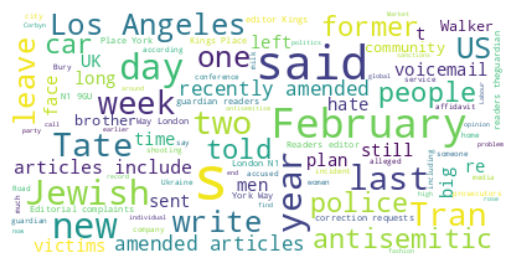

In [195]:
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()